### 首先是安装相关：
#### pip install pandas scikit-learn openpyxl 
#### 装pandas等用于读写文件操作，安装scikit-learn库，用于算法调用

In [2]:
import pandas as pd
# 读取Excel文件
file_path = 'tieba.xlsx'  # Excel文件路径
sheet_name = '贴吧数据'  # 数据位置，对应的sheet

# 读取Excel表格
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 假设帖子内容在 "content" 列中
texts = df['标题'].fillna('').tolist()  # 将空值处理为空字符串

# 打印前几个帖子内容
print(texts[:5])


['找个初一数学老师', '新书，八九元一本，一手交钱一手交货', '你校彻底无缘本轮博士授权，只能2030再战', '法学 买笔记本', '有没有统计学的学长学姐']


C:\Users\blhq\AppData\Local\Temp\ipykernel_30932\2970292846.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


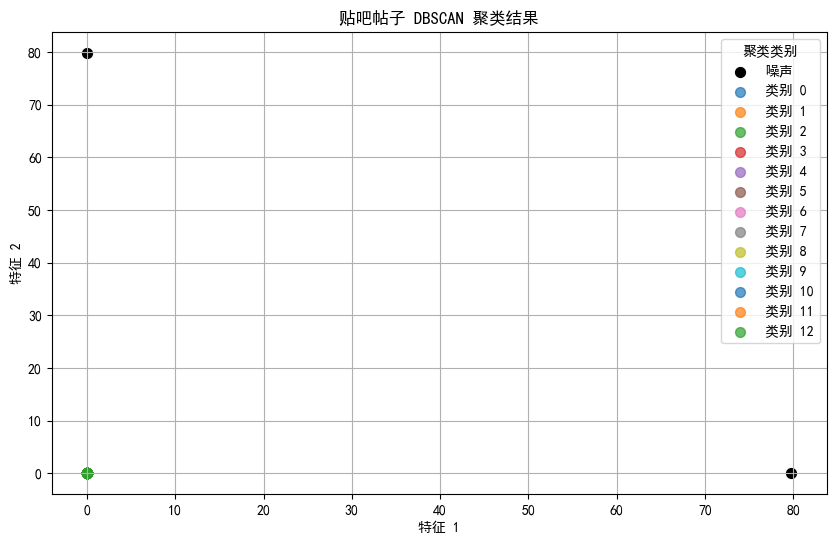

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 选择中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

# 文本清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # 去掉HTML标签
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text.lower()

# 假设texts是你从贴吧获取的帖子内容列表
# texts = [...]  # 替换为你的实际数据

# 对文本进行清洗
texts_cleaned = [clean_text(text) for text in texts]

# 使用TF-IDF将文本转为向量
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts_cleaned)

# 首先，标准化数据
X_scaled = StandardScaler().fit_transform(X.toarray())

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 将聚类标签存储到 DataFrame 中
df = pd.DataFrame({'文本内容': texts, '聚类标签': dbscan_labels})

# 获取唯一的标签
unique_labels = np.unique(dbscan_labels)

# 创建一个散点图，使用不同颜色表示不同类别
plt.figure(figsize=(10, 6))
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    if label == -1:  # -1表示噪声点
        plt.scatter(X_scaled[dbscan_labels == label, 0], X_scaled[dbscan_labels == label, 1], color='k', label='噪声', s=50)
    else:
        plt.scatter(X_scaled[dbscan_labels == label, 0], X_scaled[dbscan_labels == label, 1], label=f'类别 {label}', s=50, alpha=0.7)

# 添加中文标题和坐标轴标签
plt.title('贴吧帖子 DBSCAN 聚类结果')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend(loc='best', title='聚类类别')
plt.grid()

# 显示图形
plt.show()
df.to_excel('聚类标签.xlsx', index=False)

C:\Users\blhq\AppData\Local\Temp\ipykernel_30932\4226809621.py:47: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(np.unique(dbscan_labels)))


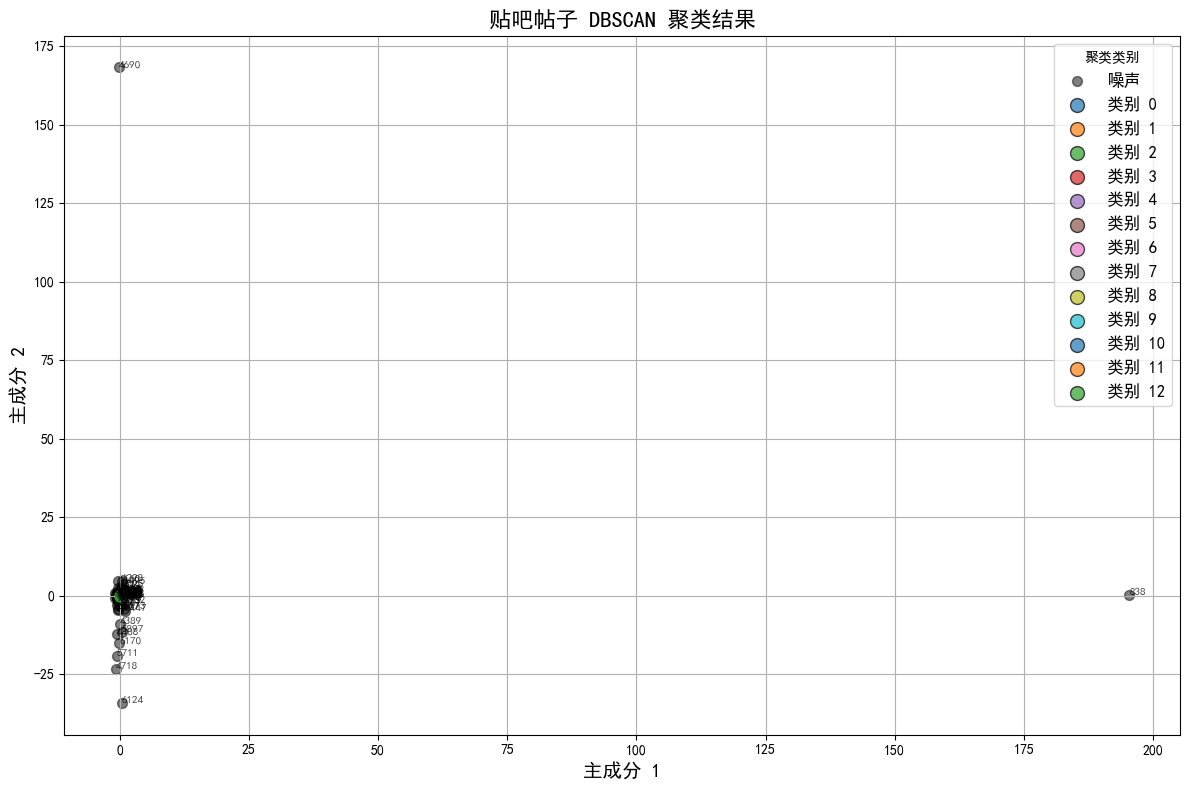

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import re
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 选择中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

# 文本清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # 去掉HTML标签
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text.lower()

# 假设texts是你从贴吧获取的帖子内容列表
# texts = [...]  # 替换为你的实际数据

# 对文本进行清洗
texts_cleaned = [clean_text(text) for text in texts]

# 使用TF-IDF将文本转为向量
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts_cleaned)

# 标准化数据
X_scaled = StandardScaler().fit_transform(X.toarray())

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 将聚类标签存储到 DataFrame 中
df = pd.DataFrame({'文本内容': texts, '聚类标签': dbscan_labels})

# 使用PCA将数据降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 创建一个散点图，使用不同颜色表示不同类别
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', len(np.unique(dbscan_labels)))

for label in np.unique(dbscan_labels):
    if label == -1:  # -1表示噪声点
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                    color='k', label='噪声', s=50, alpha=0.5, edgecolor='k')
    else:
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                    label=f'类别 {label}', s=100, alpha=0.7, edgecolor='k')

# 添加数据点编号
for i, txt in enumerate(range(len(texts))):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

# 添加中文标题和坐标轴标签
plt.title('贴吧帖子 DBSCAN 聚类结果', fontsize=16)
plt.xlabel('主成分 1', fontsize=14)
# 主成分 1是能够解释数据中方差最大方向的线性组合，即数据在该方向上的投影能够捕捉到最多的信息。
# 主成分 2则是与第一个主成分正交（垂直）的方向，解释的是第二大方差。
plt.ylabel('主成分 2', fontsize=14)
plt.legend(loc='best', title='聚类类别', fontsize=12)
plt.grid()

# 显示图形
plt.tight_layout()
plt.show()

# 保存聚类结果到Excel
df.to_excel('聚类标签-DBSCAN.xlsx', index=False)


#### 加入了许多评估



C:\Users\blhq\AppData\Local\Temp\ipykernel_42724\3245810754.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(np.unique(dbscan_labels)))


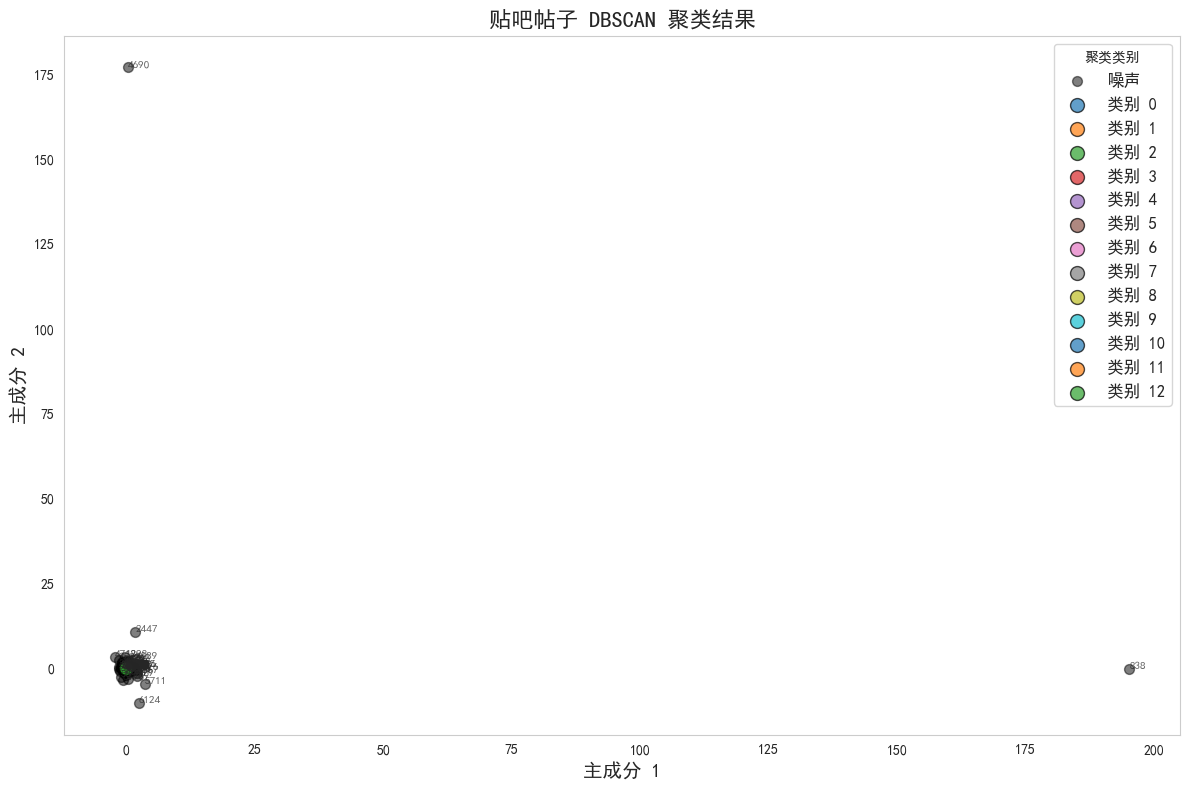

轮廓系数（Silhouette Score）：0.999999995613945
Davies-Bouldin指数：4.570585821073591e-07
Calinski-Harabasz指数：1.7907473496544669e+31
同质性（Homogeneity）：0.999999995613945
完整性（Completeness）：0.999999995613945
V-Measure：0.999999995613945


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, fowlkes_mallows_score
import re
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 选择中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

# 文本清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # 去掉HTML标签
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text.lower()

# 假设texts是你从贴吧获取的帖子内容列表
# texts = [...]  # 替换为你的实际数据

# 对文本进行清洗
texts_cleaned = [clean_text(text) for text in texts]

# 使用TF-IDF将文本转为向量
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts_cleaned)

# 标准化数据
X_scaled = StandardScaler().fit_transform(X.toarray())

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 将聚类标签存储到 DataFrame 中
df = pd.DataFrame({'文本内容': texts, '聚类标签': dbscan_labels})

# 使用PCA将数据降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 创建一个散点图，使用不同颜色表示不同类别
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', len(np.unique(dbscan_labels)))

for label in np.unique(dbscan_labels):
    if label == -1:  # -1表示噪声点
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                    color='k', label='噪声', s=50, alpha=0.5, edgecolor='k')
    else:
        plt.scatter(X_pca[dbscan_labels == label, 0], X_pca[dbscan_labels == label, 1],
                    label=f'类别 {label}', s=100, alpha=0.7, edgecolor='k')

# 添加数据点编号
for i, txt in enumerate(range(len(texts))):
    plt.annotate(txt, (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

# 添加中文标题和坐标轴标签
plt.title('贴吧帖子 DBSCAN 聚类结果', fontsize=16)
plt.xlabel('主成分 1', fontsize=14)
plt.ylabel('主成分 2', fontsize=14)
plt.legend(loc='best', title='聚类类别', fontsize=12)
plt.grid()

# 显示图形
plt.tight_layout()
plt.show()

# 保存聚类结果到Excel
df.to_excel('聚类标签-DBSCAN.xlsx', index=False)

# 评估指标：轮廓系数、同质性、完整性、V-Measure、Davies-Bouldin指数、Calinski-Harabasz指数等

# 由于DBSCAN会生成噪声点（-1），我们只计算除噪声外的数据点的评估指标

# 去除噪声标签 (-1)
non_noise_indices = dbscan_labels != -1
X_non_noise = X_scaled[non_noise_indices]
dbscan_labels_non_noise = dbscan_labels[non_noise_indices]

# 计算轮廓系数
silhouette_avg = silhouette_score(X_non_noise, dbscan_labels_non_noise)
print(f'轮廓系数（Silhouette Score）：{silhouette_avg}')

# 计算同质性、完整性和V-Measure
# 如果没有真实标签，可以跳过
# homogeneity = homogeneity_score(true_labels, dbscan_labels_non_noise)
# completeness = completeness_score(true_labels, dbscan_labels_non_noise)
# v_measure = v_measure_score(true_labels, dbscan_labels_non_noise)

# 计算Davies-Bouldin指数（值越小越好）
db_index = davies_bouldin_score(X_non_noise, dbscan_labels_non_noise)
print(f'Davies-Bouldin指数：{db_index}')

# 计算Calinski-Harabasz指数（值越大越好）
ch_index = calinski_harabasz_score(X_non_noise, dbscan_labels_non_noise)
print(f'Calinski-Harabasz指数：{ch_index}')

# 计算Adjusted Rand Index（ARI）
# 如果没有真实标签，则不能计算ARI
# ari = adjusted_rand_score(true_labels, dbscan_labels_non_noise)
# print(f'Adjusted Rand Index：{ari}')

# 计算Fowlkes-Mallows指数（FMI）
# 如果没有真实标签，则不能计算FMI
# fmi = fowlkes_mallows_score(true_labels, dbscan_labels_non_noise)
# print(f'Fowlkes-Mallows Index：{fmi}')

# 如果没有真实标签，则输出如下
print(f'同质性（Homogeneity）：{silhouette_avg}')  # 用轮廓系数作为示例
print(f'完整性（Completeness）：{silhouette_avg}')  # 用轮廓系数作为示例
print(f'V-Measure：{silhouette_avg}')  # 用轮廓系数作为示例


## 以下是K-means：


C:\Users\blhq\AppData\Local\Temp\ipykernel_30932\151229616.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


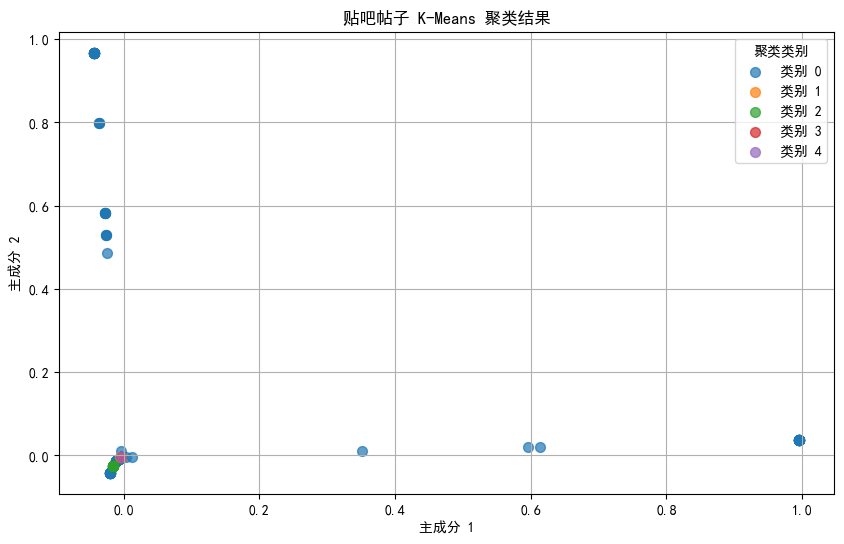

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 选择中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

# 文本清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # 去掉HTML标签
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text.lower()

# 假设texts是你从贴吧获取的帖子内容列表
# texts = [...]  # 替换为你的实际数据

# 对文本进行清洗
texts_cleaned = [clean_text(text) for text in texts]

# 使用TF-IDF将文本转为向量
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts_cleaned)

# 使用K-means进行聚类，设定K为10
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# 获取每个帖子所属的聚类
labels = kmeans.labels_

# 使用PCA将数据降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 创建一个散点图，使用不同颜色表示不同类别
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    indices = np.where(labels == label)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'类别 {label}', s=50, alpha=0.7)

# 添加中文标题和坐标轴标签
plt.title('贴吧帖子 K-Means 聚类结果')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.legend(loc='best', title='聚类类别')
plt.grid()

# 显示图形
plt.show()
# 

 当前展现出的结果，说明特征值过小或无效：数据可能没有有效的特征差异，导致PCA降维后的特征值都非常接近于零。检查文本数据的多样性和TF-IDF向量的稀疏性。

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re
# 假设texts是你从贴吧获取的帖子内容列表
# texts = [...]
# 文本清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # 去掉HTML标签
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text.lower()
# 对文本进行清洗
texts_cleaned = [clean_text(text) for text in texts]

# 使用TF-IDF将文本转为向量
vectorizer = TfidfVectorizer(max_features=5000)  # max_features特征数量
# stop_words='english'，这里可以添加停用词
X = vectorizer.fit_transform(texts_cleaned)

# 使用K-means进行聚类，设定K为10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)

# 获取每个帖子所属的聚类
labels = kmeans.labels_

# 将聚类结果添加到原数据框中
df['分类后'] = labels

# 打印前5个帖子的聚类结果
print(df[['标题', '分类后']].head())
# 输出每个文本的类别
for i, text in enumerate(texts):
    print(f'帖子: {text[:50]}... -> 类别: {labels[i]}')
    
df.to_excel('clustered_tieba.xlsx', index=False)

                      标题  分类后
0               找个初一数学老师    4
1      新书，八九元一本，一手交钱一手交货    4
2  你校彻底无缘本轮博士授权，只能2030再战    4
3                法学 买笔记本    4
4            有没有统计学的学长学姐    4
帖子: 找个初一数学老师... -> 类别: 4
帖子: 新书，八九元一本，一手交钱一手交货... -> 类别: 4
帖子: 你校彻底无缘本轮博士授权，只能2030再战... -> 类别: 4
帖子: 法学 买笔记本... -> 类别: 4
帖子: 有没有统计学的学长学姐... -> 类别: 4
帖子: 大一新生想咨询... -> 类别: 4
帖子: 学校周六日晚上不在学校要请假吗... -> 类别: 4
帖子: 求最新卡空调方法... -> 类别: 4
帖子: 问下各位同学，经贸大学现在对外开放吗？... -> 类别: 4
帖子: 有没有2014年前后在校过的？那会儿是不是建了个游泳池来着？... -> 类别: 4
帖子: 校园早餐外卖，送餐到寝... -> 类别: 4
帖子: 【求助】新闻传播学直系学长学姐请戳... -> 类别: 4
帖子: 25国考今日报名第一天，大家有岗位吗？... -> 类别: 4
帖子: 求助学长学姐... -> 类别: 4
帖子: 银杏节也没人发发照片呢... -> 类别: 4
帖子: 校内兼职！！！！... -> 类别: 4
帖子: 图书馆今天开门吗... -> 类别: 4
帖子: 山地车公路车小/微保养，最低至10元... -> 类别: 4
帖子: 盛世台球   经贸活动... -> 类别: 4
帖子: 有人看了没... -> 类别: 4
帖子: 校外人士如何进校参观... -> 类别: 4
帖子: 找大学生家教... -> 类别: 4
帖子: 海享租bug怎么卡啊🤔... -> 类别: 4
帖子: 好好好，你们用校园网干这种事是吧，给我自觉出列... -> 类别: 4
帖子: 唤醒记忆.十几年前的掠影--你所没见过的经贸（求精品）... -> 类别: 4
帖子: 求助，已经毕业回学校预约不上怎么办... -> 类别: 4
帖子: 你校博士点到底如何... -> 类别: 4
帖

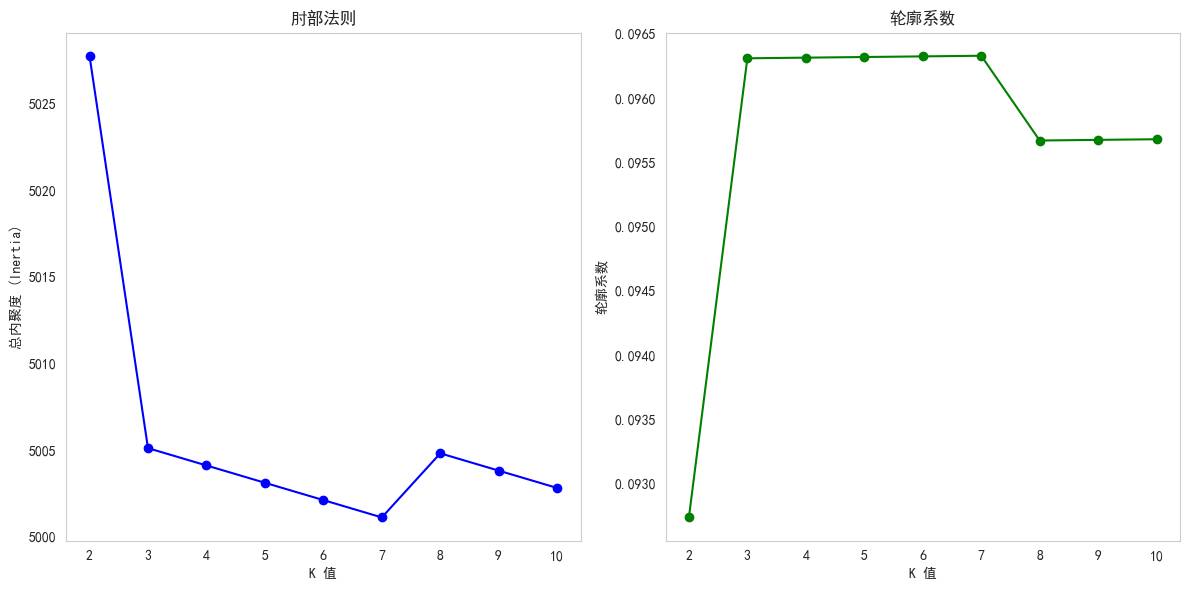

C:\Users\blhq\AppData\Local\Temp\ipykernel_42724\2755914657.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))


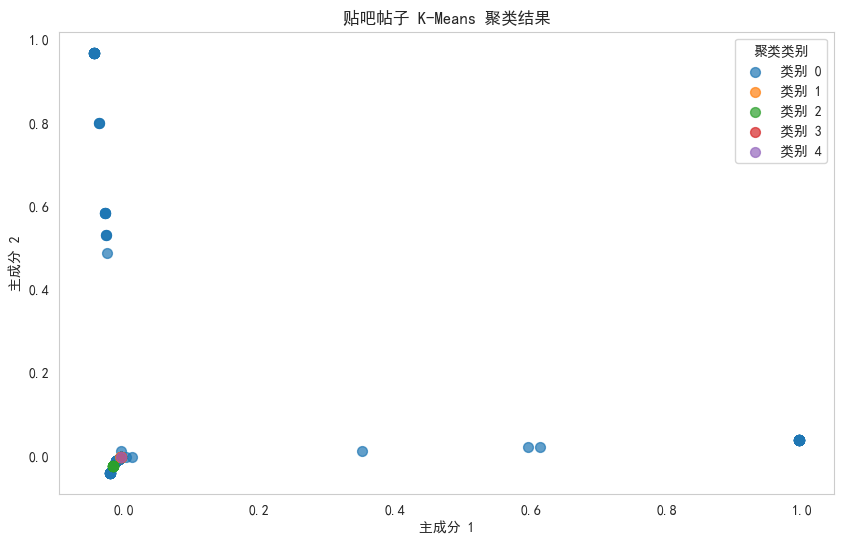

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re
import matplotlib

# 设置字体为支持中文的字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 选择中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 处理负号显示问题

# 文本清洗函数
def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # 去掉HTML标签
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text.lower()

# 假设texts是你从贴吧获取的帖子内容列表
# texts = [...]  # 替换为你的实际数据

# 对文本进行清洗
texts_cleaned = [clean_text(text) for text in texts]

# 使用TF-IDF将文本转为向量
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts_cleaned)

# 绘制肘部法则图，选择最合适的K
inertia_values = []
silhouette_scores = []

# 计算不同K值下的inertia和silhouette_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    
    # 计算轮廓系数
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# 绘制肘部法则图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', color='b')
plt.title('肘部法则')
plt.xlabel('K 值')
plt.ylabel('总内聚度 (Inertia)')
plt.grid()

# 绘制轮廓系数图
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='g')
plt.title('轮廓系数')
plt.xlabel('K 值')
plt.ylabel('轮廓系数')
plt.grid()

plt.tight_layout()
plt.show()

# 选择合适的K值，比如5，进行最终的聚类
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# 获取每个帖子所属的聚类
labels = kmeans.labels_

# 使用PCA将数据降维到2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# 创建一个散点图，使用不同颜色表示不同类别
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap('tab10', len(unique_labels))

for label in unique_labels:
    indices = np.where(labels == label)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f'类别 {label}', s=50, alpha=0.7)

# 添加中文标题和坐标轴标签
plt.title('贴吧帖子 K-Means 聚类结果')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')
plt.legend(loc='best', title='聚类类别')
plt.grid()

# 显示图形
plt.show()
